# Solving differential equations

- by Börge Göbel

## 1. Euler method

## 1.1 First order differential equation

We try to solve the following type of differential equation

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)\\)

Since \\( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}\\), we know that \\( y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)\\).

Therefore, we can repetitively iterate the propagation: 

From the value \\( y_n \\) at step \\( n \\), corresponding to the time \\( t \\), we can calculate the value \\( y_{n+1} \\) at step \\( (n+1) \\), corresponding to the time \\( (t+h) \\):

\\( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h \\) which is 

\\( y_{n+1} = y_n + f(t,y_n) h \\)

### Example 1) Radioactive decay

\\( \dot{y} = -y\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y\\)

Analytical solution: \\( y(t)=y_0 \exp(-t)\\)

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

In [2]:
# starting value 
y = 1

# number of iteration
nmax = 20

# stepsize
h = 0.1

# collect data
t_values = [0]
y_values = [y]

In [3]:
for i in range(1, nmax+1):
    f = -y
    y = y + f * h
    t_values.append(i*h)
    y_values.append(y)

In [4]:
y

0.12157665459056928

In [5]:
np.exp(-nmax*h)

0.1353352832366127

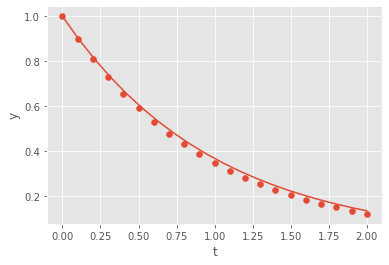

In [6]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)

plt.xlabel('t')
plt.ylabel('y')
plt.plot(test_t, test_y)
plt.scatter(t_values, y_values)

### Define a function "eulerODE"

In [7]:
def eulerODE(f, t0, y0, nmax, h):
    """
    f: function
    t0: starting time
    y0: starting value of y
    nmax: number of iterations
    h: stepsize
    """
    y = y0
    t = t0
    t_values = [0]
    y_values = [y]
    
    for i in range(1, nmax+1):
        y = y + f(t,y) * h
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

In [8]:
# define func
def f_ODE(t,y):
    return -y

# call euler method
t0 = 0
y0 = 1
nmax = 20
h = 0.01
solutions = eulerODE(f_ODE, t0, y0, nmax, h)

Text(0, 0.5, '$y$')

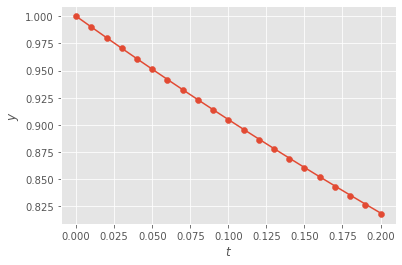

In [9]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)

plt.plot(test_t, test_y)
plt.scatter(solutions[0], solutions[1])
plt.xlabel('$t$')
plt.ylabel('$y$')

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

Text(0, 0.5, '$y$')

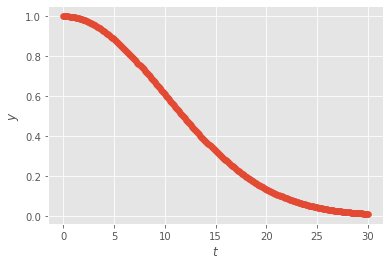

In [10]:
a = 0.01
# define func
def f_ODE(t,y):
    return -a*y*t

# call euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1
solutions = eulerODE(f_ODE, t0, y0, nmax, h)

test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.plot(test_t, test_y)
plt.scatter(solutions[0], solutions[1])
plt.xlabel('$t$')
plt.ylabel('$y$')

### 1.2 Higher-order differential equations

Example: Second-order differential equation: \\( y''(t) = f\left(t,y(t),y'(t)\right)\\)

Introduce: \\( z_0(t) = y(t)\\) and \\( z_1(t) = y'(t)\\)

\\( \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}\\)

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

\\( z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h \\)

\\( z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h \\)

Or, going back to our initial nomenclature:

\\( y_{n+1} = y_{n} + y'_{n} h \\)

\\( y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h \\)

In [11]:
def eulerODE2(f, t0, y00, y10, nmax, h):
    """
    f: function
    t0: starting time
    y00: starting value of y
    y10: starting value of y'
    nmax: number of iterations
    h: stepsize
    """
    y0 = y00
    y1 = y10
    t = t0
    t_values = [0]
    y0_values = [y0]
    y1_values = [y1]
    
    for i in range(1, nmax+1):
        y0 = y0 + y1 * h
        y1 = y1 + f(t, y0, y1) * h
        t = t + h
        t_values.append(t)
        y0_values.append(y0)
        y1_values.append(y1)
    return np.array([t_values, y0_values, y1_values])

### Example 3) Free fall

\\( \ddot{y} = -g\\) or

\\( \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g\\)

Analytical solution: \\( y(t)=-\frac{g}{2}t^2+v_0t+y_0\\)

In [12]:
g = 9.81

def f_ODE(t, y0, y1):
    return -g

t0 = 0
y00 = 10
y10 = 50
nmax = 100
h = 0.1

solutions = eulerODE2(f_ODE, t0, y00, y10, nmax, h)

Text(0, 0.5, '$y$ and $v$')

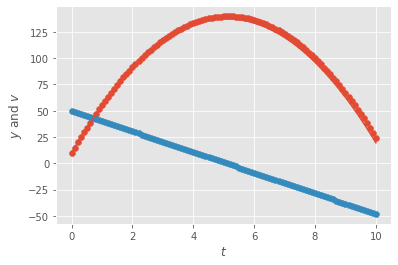

In [13]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = -g/2 * test_t**2 + y10*test_t + y00

plt.plot(test_t, test_y)
plt.scatter(solutions[0], solutions[1])
plt.scatter(solutions[0], solutions[2])
plt.xlabel('$t$')
plt.ylabel('$y$ and $v$')

### Example 4) Harmonic oscillator

\\( \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 \\)

Here, \\( b \\) is the damping parameter and \\( c \\) is determined by the pendulum length \\( c = \frac{g}{l} \\).

### Small-angle approximation

For small angles \\( \theta\ll 1 \\) and without damping b = 0, we have 

\\( \theta''(t) = - \frac{g}{l}\theta(t) \\) with the solution (for \\( \theta'(0) = 0 \\))

\\( \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) \\) and a period of \\( T = 2\pi\sqrt{\frac{l}{g}} \\)

In [14]:
length = 2
g = 9.81 
c = g / length

# Damping 
b = 0

def f_ODE(t, theta0, theta1):
    return -b*theta1 -c*theta0

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solutions = eulerODE2(f_ODE, t0, theta00, theta10, nmax, h)

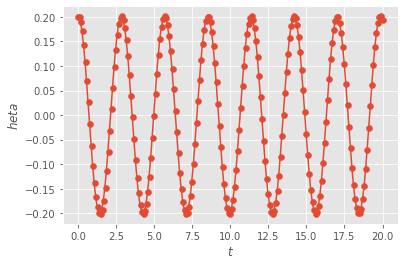

In [15]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(g/length)*test_t)

plt.plot(test_t, test_theta)
plt.scatter(solutions[0], solutions[1])
plt.xlabel('$t$');
plt.ylabel('$\theta$');

### Actual equation

- Small starting angle

In [16]:
0.2 / np.pi * 180

11.459155902616464

In [17]:
length = 2
g = 9.81 
c = g / length

# Damping 
b = 0

def f_ODE(t, theta0, theta1):
    return -b*theta1 -c*np.sin(theta0)

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solutions = eulerODE2(f_ODE, t0, theta00, theta10, nmax, h)

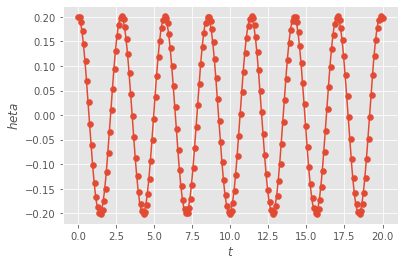

In [18]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(g/length)*test_t)

plt.plot(test_t, test_theta)
plt.scatter(solutions[0], solutions[1])
plt.xlabel('$t$');
plt.ylabel('$\theta$');

- Large starting angle

In [19]:
2 / np.pi * 180

114.59155902616465

In [20]:
theta00 = 2
h = 0.01
nmax = 2000
solutions = eulerODE2(f_ODE, t0, theta00, theta10, nmax, h)

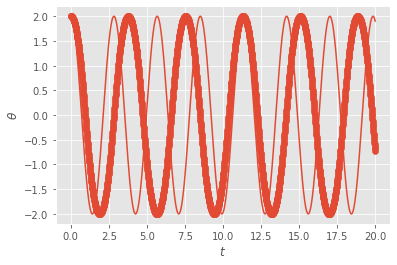

In [21]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(g/length)*test_t)

plt.plot(test_t, test_theta)
plt.scatter(solutions[0], solutions[1])
plt.xlabel('$t$');
plt.ylabel(r'$\theta$');

- With damping

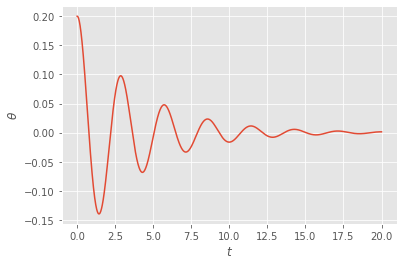

In [22]:
length = 2
g = 9.81 
c = g / length

# Damping 
b = 0.5

def f_ODE(t, theta0, theta1):
    return -b*theta1 -c*np.sin(theta0)

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 2000
h = 0.01

solutions = eulerODE2(f_ODE, t0, theta00, theta10, nmax, h)

plt.plot(solutions[0], solutions[1]);
plt.xlabel('$t$');
plt.ylabel(r'${\theta}$');

- Driven oscillator

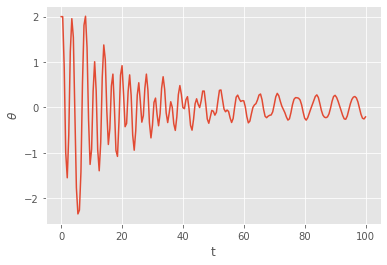

In [23]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0.1
d = -1.0
omega = 1.0

def f_ODE(t,theta0,theta1):
    return -b*theta1 - c*np.sin(theta0) - d*np.sin(omega*t)

t0 = 0
theta00 = 2.0
theta10 = 0
nmax = 200
h = 0.5

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.plot(solution[0], solution[1])

# 2. Improved methods

The exist two useful solvers:
- Old: scipy.integrate.oldeint
- New: scipy.integrate.solve_ivp

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

- Our old results (Euler method)

Text(0, 0.5, '$y$')

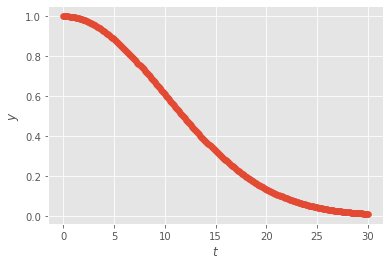

In [24]:
a = 0.01
# define func
def f_ODE(t,y):
    return -a*y*t

# call euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1
solutions = eulerODE(f_ODE, t0, y0, nmax, h)

test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.plot(test_t, test_y)
plt.scatter(solutions[0], solutions[1])
plt.xlabel('$t$')
plt.ylabel('$y$')

- New results (solve_ivp)

Text(0, 0.5, '$y$')

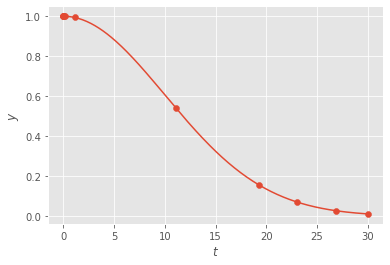

In [28]:
solution_RK45 = integrate.solve_ivp(f_ODE, [0,30], [1], method='RK45')
#solve_ivp(func, t_span, y0, method)

test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.plot(test_t, test_y)
plt.scatter(solution_RK45.t, solution_RK45.y)
plt.xlabel('$t$')
plt.ylabel('$y$')

Text(0, 0.5, '$y$')

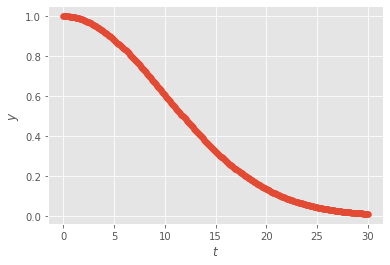

In [29]:
solution_RK45 = integrate.solve_ivp(f_ODE, [0,30], [1], method='RK45', t_eval=np.linspace(0,h*nmax,nmax))
#solve_ivp(func, t_span, y0, method)

test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)

plt.plot(test_t, test_y)
plt.scatter(solution_RK45.t, solution_RK45.y)
plt.xlabel('$t$')
plt.ylabel('$y$')

### Example 3) Free fall

### Example 4) Driven pendulum

- Our old results (Euler method)

- New results (solve_ivp)

### Compare more methods

In [12]:
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp]
# methods:
# RK45
# RK23
# DOP853
# Radau
# BDF
# LSODA

## 3. Theory of the Runge-Kutta methods

There exist several different Runge-Kutta methods

Derivation is difficult: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge%E2%80%93Kutta_fourth-order_method

### 3.1 Implementation of RK4

In [13]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Classic_fourth-order_method]



### 3.2 Implementation of RK45

In [14]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Fehlberg]



### 3.3 Comparison with Euler method